In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('weather.csv', sep=' ')
df[df.columns[-1]] = df[df.columns[-1]].str.replace(';', '', regex=False)

In [ ]:
df.head()

,T,Po,P,Pa,U,Ff,VV,Td,E;
0,18.1,772.6,772.9,0.2,80,0,10.0,14.6,0
1,15.9,770.2,770.6,0.8,92,1,10.0,14.6,0
2,17.9,765.6,766.0,0.3,64,1,10.0,11.0,0
3,18.5,763.9,764.2,0.3,63,2,10.0,11.4,0
4,19.1,762.2,762.6,0.4,78,2,10.0,15.2,0


In [ ]:
df.corr()

,T,Po,P,Pa,U,Ff,VV,Td,E;
T,1.000000,-0.019128,-0.020068,-0.128654,-0.469614,-0.143938,0.266167,0.911606,-0.548728
Po,-0.019128,1.000000,0.999975,0.186200,-0.299099,-0.267657,0.117090,-0.156298,-0.219205
P,-0.020068,0.999975,1.000000,0.186351,-0.299346,-0.267350,0.116682,-0.157473,-0.219212
Pa,-0.128654,0.186200,0.186351,1.000000,0.045610,0.158860,0.126863,-0.119002,0.108069
U,-0.469614,-0.299099,-0.299346,0.045610,1.000000,0.070197,-0.401060,-0.071074,0.594888
Ff,-0.143938,-0.267657,-0.267350,0.158860,0.070197,1.000000,0.056167,-0.116693,0.106181
VV,0.266167,0.117090,0.116682,0.126863,-0.401060,0.056167,1.000000,0.140571,-0.239802
Td,0.911606,-0.156298,-0.157473,-0.119002,-0.071074,-0.116693,0.140571,1.000000,-0.343874
E;,-0.548728,-0.219205,-0.219212,0.108069,0.594888,0.106181,-0.239802,-0.343874,1.000000


In [ ]:
pca = PCA()
pca.fit(df)

# Объясненная дисперсия для каждой компоненты
lambdas = pca.explained_variance_

print(lambdas)


[2.71666845e+02 1.21239572e+02 6.74840126e+01 2.89630653e+00
 9.17503898e-01 5.15359598e-01 1.33368458e-01 1.21580254e-01
 1.08087927e-03]


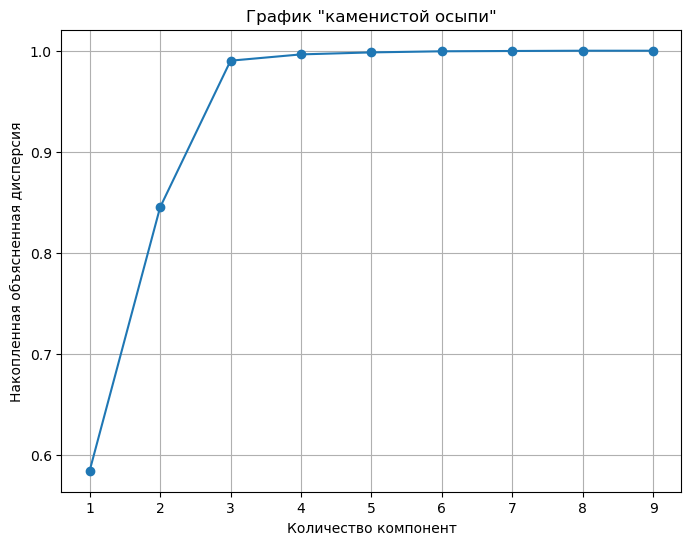

In [ ]:
# График каменистой осыпи
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('График "каменистой осыпи"')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.grid()
plt.show()

In [ ]:
#Будем работать с тремя компонентами
n=3

#Доля объясненной дисперсии для каждой компоненты
part_of_variance = pca.explained_variance_ratio_

sum = 0

print('Процент объясненной дисперсии для 3 компонент: ')
for i in range(n):
    sum+=part_of_variance[i]
    print(sum * 100)  # В процентах

Процент объясненной дисперсии для 3 компонент: 
58.426039547404706
84.50043237348864
99.0138838851676


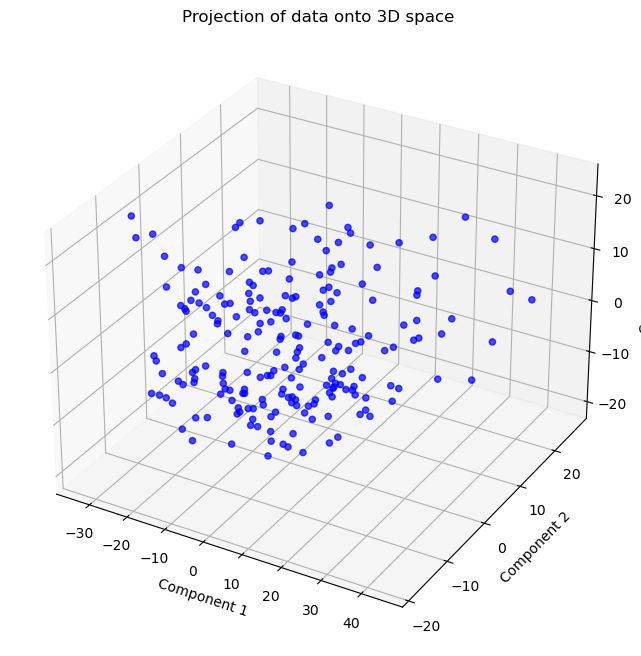

In [ ]:
#Проекция на новое пространство
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
df_reduced = pca.fit_transform(df)

# Построение проекции данных в 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_reduced[:, 0], df_reduced[:, 1], df_reduced[:, 2], c='blue', alpha=0.7)
ax.set_title('Projection of data onto 3D space')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

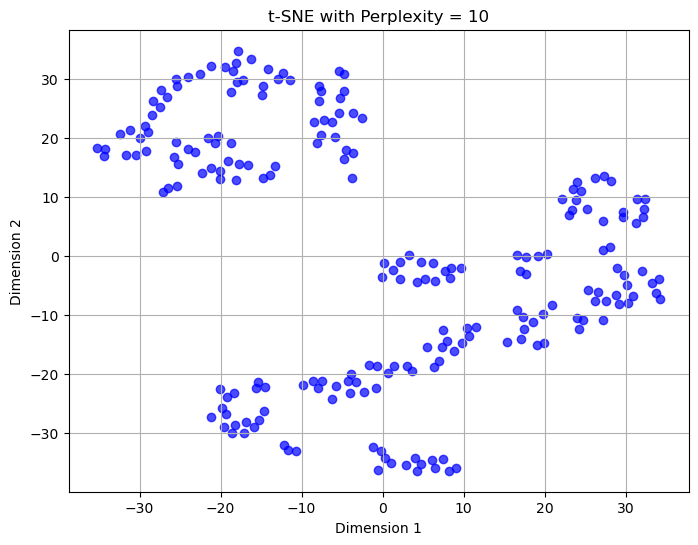

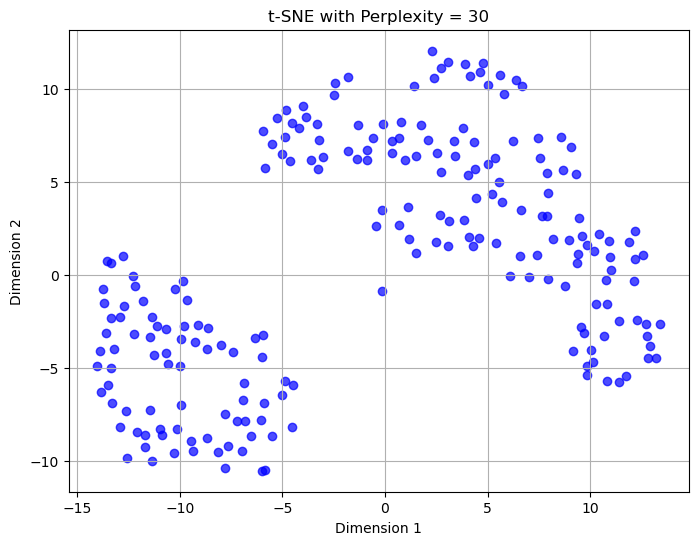

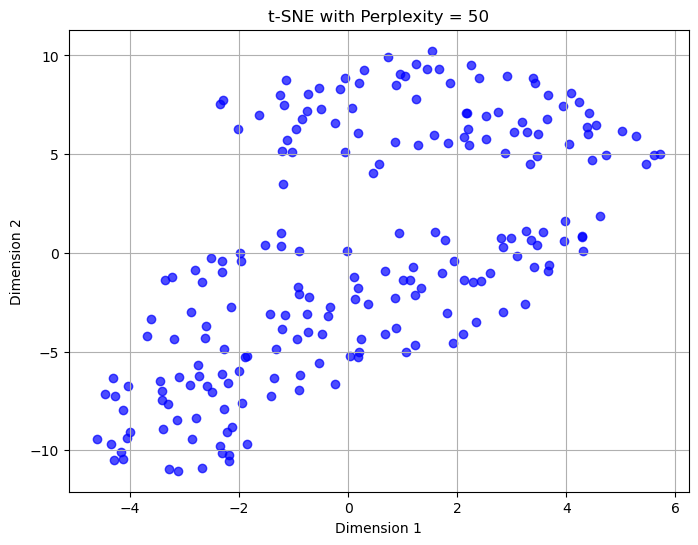

In [ ]:
from sklearn.manifold import TSNE

perplexities = [10, 30, 50]

for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity, n_components=2, random_state=0)
    df_tsne = tsne.fit_transform(df_reduced)

    plt.figure(figsize=(8, 6))
    plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c='blue', alpha=0.7)
    plt.title(f't-SNE with Perplexity = {perplexity}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid()
    plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy import exp

# Вычисляем матрицу попарных расстояний между объектами
distance_matrix = pairwise_distances(df, metric='euclidean')

# Вычисляем условные вероятности сходства
sigma = 2 * (np.median(distance_matrix)) ** 2
P = np.exp(-distance_matrix ** 2 / (2 * (sigma ** 2)))
P /= np.sum(P, axis=1, keepdims=True)  # Нормализуем вероятности
print(P)

[[0.00469578 0.0046956  0.00469538 ... 0.004694   0.00469443 0.00469418]
 [0.0046958  0.00469598 0.00469505 ... 0.00469458 0.00469445 0.00469484]
 [0.00469513 0.00469461 0.00469554 ... 0.00469311 0.00469455 0.0046938 ]
 ...
 [0.00469514 0.00469552 0.0046945  ... 0.00469692 0.00469618 0.00469591]
 [0.00469457 0.00469439 0.00469493 ... 0.00469518 0.00469593 0.004695  ]
 [0.00469453 0.00469499 0.0046944  ... 0.00469512 0.0046952  0.00469613]]
